In [ ]:
# Application Programming Interface 
# it act like middle man - between two application
# it let you pull data from server (only those data which server allowed) 
# and provide you the data (not let you access data which server  restricted )

In [7]:
#Copied python data from coinmarketcap 

#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7aeef531-9ab2-4b90-84f3-6542597dae10',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-17T11:54:20.792Z', 'error_code': 0, 'error_message': None, 'elapsed': 1225, 'credit_count': 1, 'notice': None, 'total_count': 9965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [3]:
type(data)

dict

In [8]:
import pandas as pd

#This allows you to see all the columns& rowa, not just like 15

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [9]:
#This normalizes the data and makes it all pretty in a dataframe
df=pd.json_normalize(data['data'])
df['TimeStampe']=pd.to_datetime('now')
df

#I changed 'limit':'5000' to 15 in parameters command in first cell

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,TimeStampe
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969951e+07,1.969951e+07,False,NaN,1,NaN,NaN,None,2024-05-17T11:52:00.000Z,66297.747368,3.141705e+10,-23.7307,-0.209903,0.062435,4.925038,5.290596,-2.807519,28.110248,1.306033e+12,54.3625,1.392253e+12,None,2024-05-17T11:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 17:24:43.854522
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,None,2024-05-17T11:51:00.000Z,3034.175286,1.444792e+10,-5.5482,-0.104859,0.994709,0.127613,-0.617095,-15.697499,9.005582,3.644661e+11,15.1760,3.644661e+11,None,2024-05-17T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 17:24:43.854522
2,825,Tether USDt,USDT,tether,85792,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T11:51:00.000Z,1.000080,6.126538e+10,-18.3527,0.004480,-0.041634,0.017391,-0.052580,0.118718,-0.022750,1.112144e+11,4.6308,1.140957e+11,None,2024-05-17T11:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 17:24:43.854522
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T11:51:00.000Z,579.243621,1.775596e+09,-13.1372,0.199611,-0.451872,-2.711479,8.235913,1.748516,62.126423,8.548852e+10,3.5596,8.548852e+10,None,2024-05-17T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 17:24:43.854522
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488047e+08,5.761681e+08,True,NaN,5,NaN,NaN,None,2024-05-17T11:51:00.000Z,168.142877,3.617173e+09,-17.3501,-0.187623,3.047544,9.248132,23.808882,-18.673445,53.539744,7.546331e+10,3.1422,9.687856e+10,None,2024-05-17T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 17:24:43.854522
5,3408,USDC,USDC,usd-coin,19180,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331868e+10,3.331868e+10,False,NaN,6,NaN,NaN,None,2024-05-17T11:51:00.000Z,0.999959,6.809841e+09,-19.9562,-0.000063,-0.018221,-0.003821,-0.009865,0.002367,-0.000927,3.331732e+10,1.3873,3.331732e+10,None,2024-05-17T11:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 17:24:43.854522
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T11:52:00.000Z,0.520870,1.129017e+09,-8.3968,-0.197305,0.437756,1.089162,6.332723,-14.890169,-6.055440,2.879836e+10,1.1987,5.208701e+10,None,2024-05-17T11:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 17:24:43.854522
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474217e+09,5.106701e+09,True,NaN,8,3.414167e+09,2.272454e+10,None,2024-05-17T11:51:00.000Z,6.655956,6.454955e+08,10.6252,-0.415149,0.695675,-4.443373,7.924532,72.779099,204.999991,2.312423e+10,0.9629,3.398997e+10,None,2024-05-17T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 17:24:43.854522
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me

In [31]:

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7aeef531-9ab2-4b90-84f3-6542597dae10',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df2=pd.json_normalize(data['data'])
    df2['TimeStampe']=pd.to_datetime('now')
    df=df._append(df2)
    
     # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    #if not os.path.isfile(r"C:\Users\ASUS\Downloads\Data Analyst\Python\Python File sorter\API_Test"):
         #df.to_csv(r"C:\Users\ASUS\Downloads\Data Analyst\Python\Python File sorter\API_Test.csv", header='column_names')
    #else:
        #df.to_csv(r"C:\Users\ASUS\Downloads\Data Analyst\Python\Python File sorter\API_Test.csv", mode='a', header=False)

In [32]:
import os
from time import time
from time import sleep

for i in range(333):    #range(333) used bcoz site allowed us only 333 api runner in a day
    api_runner()
    print('Api ran Successfully')
    sleep(120)           #sleep for 2 min
exit() 

{'status': {'timestamp': '2024-05-17T12:52:52.804Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-05-17T12:54:53.879Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [ ]:
#df.read_csv(r"C:\Users\ASUS\Downloads\Data Analyst\Python\Python File sorter\API_Test.csv")

In [33]:
df
# we complete API project successfully, 
#Now we just do some clean up and Visualization

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969951e+07,1.969951e+07,False,NaN,1,NaN,NaN,None,2024-05-17T12:53:00.000Z,66505.195543,3.015108e+10,-23.6388,0.289341,0.356009,5.526798,6.576731,-2.862750,28.597707,1.310120e+12,54.3523,1.396609e+12,None,2024-05-17T12:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,None,2024-05-17T12:52:00.000Z,3075.152235,1.420082e+10,-4.3255,1.398616,2.784441,1.616444,1.455479,-14.351467,10.355990,3.693882e+11,15.3246,3.693882e+11,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
2,825,Tether USDt,USDT,tether,85794,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T12:52:00.000Z,1.000023,5.908717e+10,-18.7589,-0.039008,-0.061573,0.000150,-0.041146,0.111952,-0.023443,1.112081e+11,4.6136,1.140892e+11,None,2024-05-17T12:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 18:24:53.942468
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T12:52:00.000Z,579.717505,1.690257e+09,-17.9670,0.131973,0.159130,-2.459845,8.075476,2.414898,61.753546,8.555846e+10,3.5495,8.555846e+10,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488047e+08,5.761681e+08,True,NaN,5,NaN,NaN,None,2024-05-17T12:52:00.000Z,168.530084,3.566526e+09,-14.2913,0.323951,3.722812,9.846849,27.625505,-18.866803,54.021894,7.563709e+10,3.1379,9.710165e+10,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
5,3408,USDC,USDC,usd-coin,19181,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331868e+10,3.331868e+10,False,NaN,6,NaN,NaN,None,2024-05-17T12:52:00.000Z,1.000024,6.604979e+09,-19.4287,-0.009663,-0.034043,0.003076,0.003138,0.014531,0.008525,3.331947e+10,1.3823,3.331947e+10,None,2024-05-17T12:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 18:24:53.942468
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T12:53:00.000Z,0.523923,1.105567e+09,-7.9059,0.584349,1.399088,2.227645,7.751435,-14.122921,-5.521373,2.896713e+10,1.2017,5.239227e+10,None,2024-05-17T12:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474217e+09,5.106701e+09,True,NaN,8,3.414167e+09,2.289299e+10,None,2024-05-17T12:52:00.000Z,6.705293,5.908258e+08,-5.3843,0.754845,2.763948,-5.327851,9.176822,74.417416,205.943727,2.329564e+10,0.9665,3.424193e+10,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [34]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # we customize the float type into(1 digit after decimal) format

In [35]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19699509.0,19699509.0,False,NaN,1,NaN,NaN,None,2024-05-17T12:53:00.000Z,66505.2,30151079311.7,-23.6,0.3,0.4,5.5,6.6,-2.9,28.6,1310119698140.5,54.4,1396609106397.0,None,2024-05-17T12:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
1,1027,Ethereum,ETH,ethereum,8938,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120120311.4,120120311.4,True,NaN,2,NaN,NaN,None,2024-05-17T12:52:00.000Z,3075.2,14200818717.0,-4.3,1.4,2.8,1.6,1.5,-14.4,10.4,369388244120.1,15.3,369388244120.1,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
2,825,Tether USDt,USDT,tether,85794,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111205483123.9,114086550454.4,True,NaN,3,NaN,NaN,None,2024-05-17T12:52:00.000Z,1.0,59087173789.7,-18.8,-0.0,-0.1,0.0,-0.0,0.1,-0.0,111208094935.9,4.6,114089229932.3,None,2024-05-17T12:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 18:24:53.942468
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586472.6,147586472.6,False,NaN,4,NaN,NaN,None,2024-05-17T12:52:00.000Z,579.7,1690257047.6,-18.0,0.1,0.2,-2.5,8.1,2.4,61.8,85558461711.5,3.5,85558461711.5,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448804697.2,576168076.2,True,NaN,5,NaN,NaN,None,2024-05-17T12:52:00.000Z,168.5,3566526452.5,-14.3,0.3,3.7,9.8,27.6,-18.9,54.0,75637093422.5,3.1,97101654407.2,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
5,3408,USDC,USDC,usd-coin,19181,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33318682954.5,33318682954.5,False,NaN,6,NaN,NaN,None,2024-05-17T12:52:00.000Z,1.0,6604978630.9,-19.4,-0.0,-0.0,0.0,0.0,0.0,0.0,33319473695.4,1.4,33319473695.5,None,2024-05-17T12:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 18:24:53.942468
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.0,55288951055.0,99987612649.0,False,NaN,7,NaN,NaN,None,2024-05-17T12:53:00.000Z,0.5,1105566737.7,-7.9,0.6,1.4,2.2,7.8,-14.1,-5.5,28967133922.9,1.2,52392265308.3,None,2024-05-17T12:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474216990.3,5106700920.2,True,NaN,8,3414166606.0,22892988898.5,None,2024-05-17T12:52:00.000Z,6.7,590825828.3,-5.4,0.8,2.8,-5.3,9.2,74.4,205.9,23295644345.6,1.0,34241928108.8,None,2024-05-17T12:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144326656383.7,144326656383.7,True,NaN,9,NaN,NaN,None,2024-05-17T12:53:00.000Z,0.2,1114816935.0,-35.9,0.7,-0.2,2.2,1.0,3.6,81.3,22157954203.5,0.9,22157954203.5,None,2024-05-17T12:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 18:24:53.942468
9,2010,Cardano,ADA,cardano,1171,2017-10-01T00:00:00.000Z,"[dpos, p

In [43]:
df2=df.set_index('name')
df3=df2.filter(items=['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],axis=1)
df3
#df2=df.set_index('Country')
#df2.filter(items=['Continent','CCA3'], axis=1)

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.4,5.5,6.6,-2.9,28.6
Ethereum,2.8,1.6,1.5,-14.4,10.4
Tether USDt,-0.1,0.0,-0.0,0.1,-0.0
BNB,0.2,-2.5,8.1,2.4,61.8
Solana,3.7,9.8,27.6,-18.9,54.0
USDC,-0.0,0.0,0.0,0.0,0.0
XRP,1.4,2.2,7.8,-14.1,-5.5
Toncoin,2.8,-5.3,9.2,74.4,205.9
Dogecoin,-0.2,2.2,1.0,3.6,81.3


In [45]:
df4=df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_24h     0.4
           quote.USD.percent_change_7d      5.5
           quote.USD.percent_change_30d     6.6
           quote.USD.percent_change_60d    -2.9
           quote.USD.percent_change_90d    28.6
                                           ... 
Chainlink  quote.USD.percent_change_24h    20.3
           quote.USD.percent_change_7d     16.7
           quote.USD.percent_change_30d    26.3
           quote.USD.percent_change_60d   -13.4
           quote.USD.percent_change_90d   -16.1
Length: 75, dtype: float64

In [46]:
type(df4)

pandas.core.series.Series

In [53]:
df5=df4.to_frame(name='values')
df5

values
name                                          
Bitcoin   quote.USD.percent_change_24h     0.4
          quote.USD.percent_change_7d      5.5
          quote.USD.percent_change_30d     6.6
          quote.USD.percent_change_60d    -2.9
          quote.USD.percent_change_90d    28.6
...                                        ...
Chainlink quote.USD.percent_change_24h    20.3
          quote.USD.percent_change_7d     16.7
          quote.USD.percent_change_30d    26.3
          quote.USD.percent_change_60d   -13.4
          quote.USD.percent_change_90d   -16.1

[75 rows x 1 columns]

In [54]:
type(df5)

pandas.core.frame.DataFrame

In [55]:
df5.count()

values    75
dtype: int64

In [56]:
index=pd.Index(range(90))

df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_24h,0.4
1,Bitcoin,quote.USD.percent_change_7d,5.5
2,Bitcoin,quote.USD.percent_change_30d,6.6
3,Bitcoin,quote.USD.percent_change_60d,-2.9
4,Bitcoin,quote.USD.percent_change_90d,28.6
...,...,...,...
70,Chainlink,quote.USD.percent_change_24h,20.3
71,Chainlink,quote.USD.percent_change_7d,16.7
72,Chainlink,quote.USD.percent_change_30d,26.3
73,Chainlink,quote.USD.percent_change_60d,-13.4


In [57]:
import seaborn as sb
import matplotlib.pyplot as plt

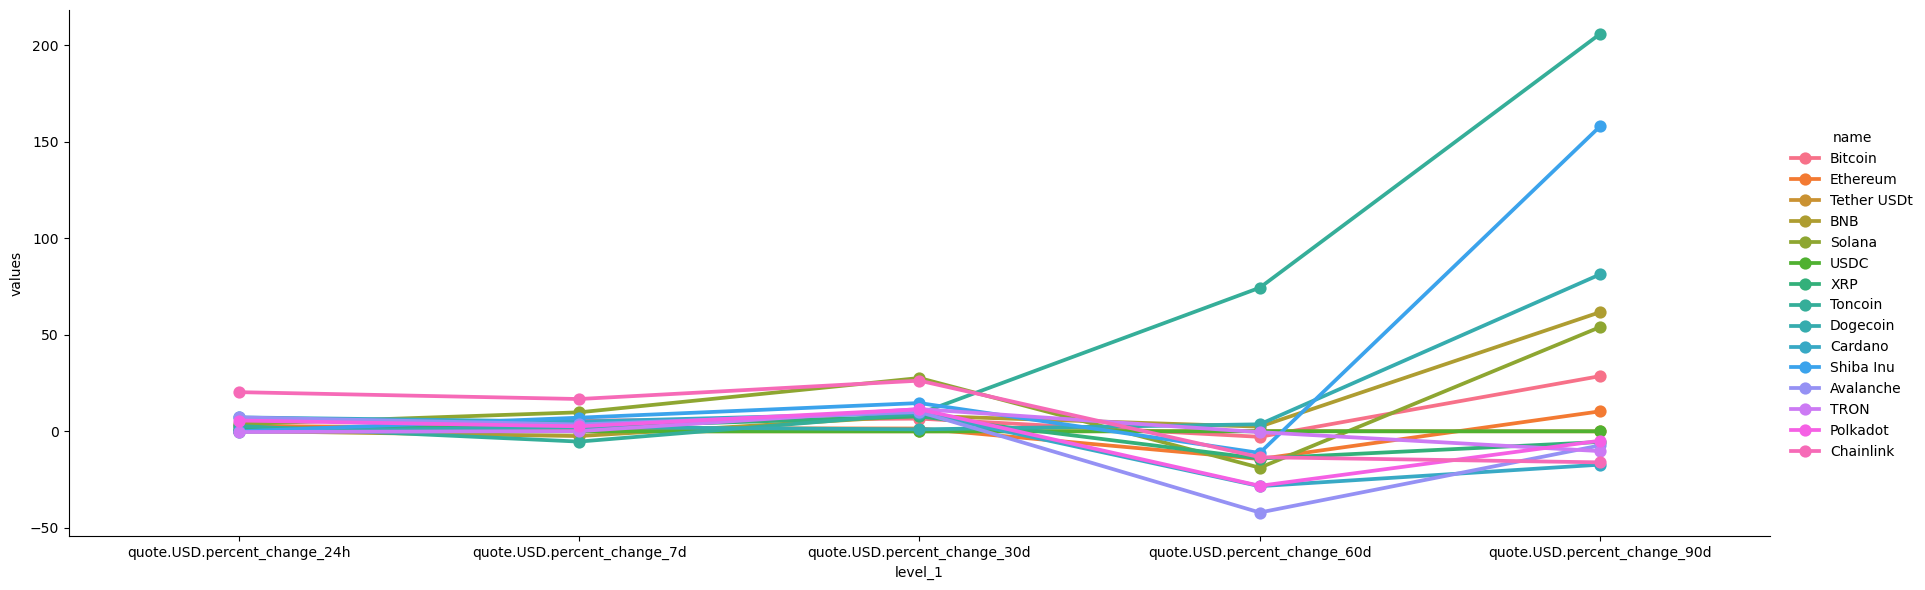

In [64]:
#ax = plt.subplots(figsize=(10,5))
sb.catplot(x='level_1', y='values', hue='name', data=df6, kind='point', height=6, aspect=3)

In [74]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want
df7=df[['name','quote.USD.price','timestamp']]
df7=df7.query("name=='Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,66505.2,2024-05-17 18:24:53.942468


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

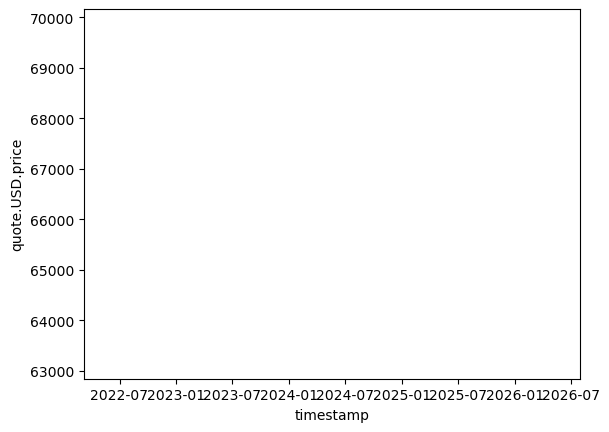

In [78]:
#sns.set_theme(style="darkgrid")                  --- for darkmode


#sb.lineplot(x='timestamp', y= 'quote.USD.price', data=df7)